# Import Required Libraries for Data Processing

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download Datasets using Kaggle API
Create kaggle api key

In [2]:
!echo "{\"username\":\"tusharkhorwal\",\"key\":\"e6c399a380126eca927eab01327d774b\"}" >> kaggle.json

Setup kaggle api

In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Unzip downloaded files

In [4]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

100% 2.05G/2.06G [00:19<00:00, 81.3MB/s]
100% 2.06G/2.06G [00:19<00:00, 111MB/s] 
 98% 764M/778M [00:06<00:00, 155MB/s]
100% 778M/778M [00:06<00:00, 120MB/s]


Download datasets

In [ ]:
!unzip chest-xray-covid19-pneumonia
!unzip covid19-radiography-database

# Read Excel files using pandas
read excel files from COVID-19_Radiography_Dataset which contains info about image filenames and add label COVID, NORMAL or PNEUMONIA

In [6]:
train_cov=pd.read_excel("/content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx")
train_cov["label"]= "COVID"
train_nor=pd.read_excel("/content/COVID-19_Radiography_Dataset/Normal.metadata.xlsx").sample(4192)
train_nor["label"]= "NORMAL"
train_pneu=pd.read_excel("/content/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx")
train_pneu["label"]= "PNEUMONIA"

**Excel file of Normal category**

In [7]:
train_pneu

,FILE NAME,FORMAT,SIZE,URL,label
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,PNEUMONIA
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,PNEUMONIA
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,PNEUMONIA
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,PNEUMONIA
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,PNEUMONIA
...,...,...,...,...,...
1340,Viral Pneumonia-1341,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,PNEUMONIA
1341,Viral Pneumonia-1342,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,PNEUMONIA
1342,Viral Pneumonia-1343,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,PNEUMONIA
1343,Viral Pneumonia-1344,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...,PNEUMONIA


# Generate dataframe for Pneumonia Images

Fetch data from COVID-19_Radiography_Dataset

In [8]:
train_dir='/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/'
data=[]
labels=[]
for i in range(train_pneu.shape[0]):
    data.append(train_dir+train_pneu['FILE NAME'].iloc[i]+'.png')
    labels.append(train_pneu['label'].iloc[i])
df_pneu=pd.DataFrame(data)
df_pneu.columns=['images']
df_pneu['target']=labels

In [9]:
df_pneu

,images,target
0,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
1,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
2,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
3,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
4,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
...,...,...
1340,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
1341,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
1342,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
1343,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA


Fetch data from chest-xray-covid19-pneumonia dataset

In [10]:
image_count = 0
pneu_data = []
for dirname, _, filenames in os.walk('/content/Data/train/PNEUMONIA'):
    for filename in filenames:
        image_count = image_count + 1
        if image_count<=2847:
            pneu_data.append(os.path.join(dirname, filename))

In [11]:
df_pneu2 = pd.DataFrame(pneu_data)

In [12]:
df_pneu2.rename(columns = {0:'images'}, inplace = True)
df_pneu2["target"] = "PNEUMONIA"

In [13]:
df_pneu2

,images,target
0,/content/Data/train/PNEUMONIA/PNEUMONIA(122).jpg,PNEUMONIA
1,/content/Data/train/PNEUMONIA/PNEUMONIA(3060).jpg,PNEUMONIA
2,/content/Data/train/PNEUMONIA/PNEUMONIA(328).jpg,PNEUMONIA
3,/content/Data/train/PNEUMONIA/PNEUMONIA(297).jpg,PNEUMONIA
4,/content/Data/train/PNEUMONIA/PNEUMONIA(3268).jpg,PNEUMONIA
...,...,...
2842,/content/Data/train/PNEUMONIA/PNEUMONIA(2784).jpg,PNEUMONIA
2843,/content/Data/train/PNEUMONIA/PNEUMONIA(28).jpg,PNEUMONIA
2844,/content/Data/train/PNEUMONIA/PNEUMONIA(2125).jpg,PNEUMONIA
2845,/content/Data/train/PNEUMONIA/PNEUMONIA(2980).jpg,PNEUMONIA


# Generate dataframe for Covid Images

Fetching data from chest-xray-covid19-pneumonia dataset

In [14]:
import os
import pandas as pd
cov_data = []
x = 0
for dirname, _, filenames in os.walk('/content/Data/train/COVID19'):
    for filename in filenames:
            cov_data.append(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('/content/Data/test/COVID19'):
    for filename in filenames:
            cov_data.append(os.path.join(dirname, filename))

In [15]:
df_cov2 = pd.DataFrame(cov_data)
df_cov2.rename(columns = {0:'images'}, inplace = True)
df_cov2["target"] = "COVID"

In [16]:
df_cov2

,images,target
0,/content/Data/train/COVID19/COVID19(189).jpg,COVID
1,/content/Data/train/COVID19/COVID19(95).jpg,COVID
2,/content/Data/train/COVID19/COVID19(252).jpg,COVID
3,/content/Data/train/COVID19/COVID19(155).jpg,COVID
4,/content/Data/train/COVID19/COVID19(109).jpg,COVID
...,...,...
571,/content/Data/test/COVID19/COVID19(472).jpg,COVID
572,/content/Data/test/COVID19/COVID19(531).jpg,COVID
573,/content/Data/test/COVID19/COVID19(503).jpg,COVID
574,/content/Data/test/COVID19/COVID19(529).jpg,COVID


In [17]:
train_cov

,FILE NAME,FORMAT,SIZE,URL,label
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID
...,...,...,...,...,...
3611,COVID-3612,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,COVID
3612,COVID-3613,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,COVID
3613,COVID-3614,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,COVID
3614,COVID-3615,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,COVID


Fetch data from COVID-19_Radiography_Dataset

In [18]:
train_dir='/content/COVID-19_Radiography_Dataset/COVID/images/'
data=[]
labels=[]
for i in range(train_cov.shape[0]):
    data.append(train_dir+train_cov['FILE NAME'].iloc[i]+'.png')
    labels.append(train_cov['label'].iloc[i])
df_cov=pd.DataFrame(data)
df_cov.columns=['images']
df_cov['target']=labels

In [19]:
df_cov

,images,target
0,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID
1,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID
2,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID
3,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID
4,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID
...,...,...
3611,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID
3612,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID
3613,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID
3614,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID


# Generate dataframe for Normal Images

Fetch from COVID-19_Radiography_Dataset

In [20]:
train_dir='/content/COVID-19_Radiography_Dataset/Normal/images/'
data=[]
labels=[]
for i in range(train_nor.shape[0]):
    data.append(train_dir+train_nor['FILE NAME'].iloc[i].title()+'.png')
    labels.append(train_nor['label'].iloc[i])
df_nor=pd.DataFrame(data)
df_nor.columns=['images']
df_nor['target']=labels

In [21]:
df_nor

,images,target
0,/content/COVID-19_Radiography_Dataset/Normal/i...,NORMAL
1,/content/COVID-19_Radiography_Dataset/Normal/i...,NORMAL
2,/content/COVID-19_Radiography_Dataset/Normal/i...,NORMAL
3,/content/COVID-19_Radiography_Dataset/Normal/i...,NORMAL
4,/content/COVID-19_Radiography_Dataset/Normal/i...,NORMAL
...,...,...
4187,/content/COVID-19_Radiography_Dataset/Normal/i...,NORMAL
4188,/content/COVID-19_Radiography_Dataset/Normal/i...,NORMAL
4189,/content/COVID-19_Radiography_Dataset/Normal/i...,NORMAL
4190,/content/COVID-19_Radiography_Dataset/Normal/i...,NORMAL


In [22]:
train=pd.concat([df_pneu,df_nor,df_cov,df_pneu2,df_cov2])
train=train.reset_index()
train= train.drop(["index"], axis=1)

In [23]:
train

,images,target
0,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
1,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
2,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
3,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
4,/content/COVID-19_Radiography_Dataset/Viral Pn...,PNEUMONIA
...,...,...
12571,/content/Data/test/COVID19/COVID19(472).jpg,COVID
12572,/content/Data/test/COVID19/COVID19(531).jpg,COVID
12573,/content/Data/test/COVID19/COVID19(503).jpg,COVID
12574,/content/Data/test/COVID19/COVID19(529).jpg,COVID


In [24]:
import os.path
count=0
for x in train['images']:
  if os.path.isfile(x):
    count+=1
  else:
    print(x)
    

# Dataset distribution

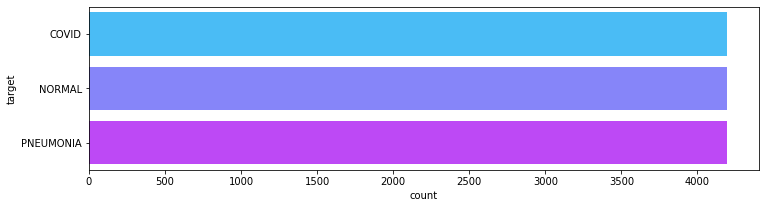

PNEUMONIA    4192
NORMAL       4192
COVID        4192
Name: target, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,3))
splot = sns.countplot(data = train.sort_values(by='target'), y ='target', palette='cool', saturation=0.9)
plt.show()
train["target"].value_counts()

# Split dataset into train and test data
train:test => 80:20  
shuffle = true

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train['images'],train['target'],test_size=0.2, shuffle=True)

train_gen = pd.DataFrame({'image_dir': x_train, 'target': y_train})
val_gen = pd.DataFrame({'image_dir': x_val, 'target': y_val})

In [27]:
print('Sizes:-')
print('train_data: ', train_gen.shape[0])
print('test_data: ', val_gen.shape[0])

Sizes:-
train_data:  10060
test_data:  2516


# Import Required Libraries

In [28]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras import layers
from keras.metrics import AUC
from keras.activations import sigmoid
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from keras import Model
from keras.models import * 
from keras.preprocessing import image
from keras.callbacks import EarlyStopping

# Data Augmentation

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)


In [30]:
train_generator = train_datagen.flow_from_dataframe(
    train_gen,
    x_col='image_dir',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    shuffle=True,
    class_mode='sparse',
validate_filenames=True)

validation_generator = val_datagen.flow_from_dataframe(
    val_gen,
    x_col='image_dir',
    y_col='target',
    target_size=(256, 256),
    shuffle=False,
    batch_size=32,
    class_mode='sparse',
validate_filenames=True)

Found 10060 validated image filenames belonging to 3 classes.
Found 2516 validated image filenames belonging to 3 classes.


In [31]:
train_generator.class_indices

{'COVID': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

# Model Architecture

In [32]:
model = Sequential()

model.add(BatchNormalization(input_shape=(256,256,3)))

model.add(Conv2D(64, 3, activation='relu', ))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(128,3,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(512, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(3, activation= 'softmax'))

# Hyperparameters

In [33]:
learning_rate = 1e-3
nb_epochs = 30
batch_size=32
opt = Adam(learning_rate)


Adam optimizer used with learning rate of 0.001  


In [34]:
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 256, 256, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0

**to stop training if validation loss is not decreasing after certain epochs**

In [36]:
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Train Model

In [37]:
hist=model.fit(
    train_generator,
    epochs=nb_epochs,
    verbose=1,
    callbacks=[early_stop],
    validation_data=validation_generator)

Epoch 1/30
315/315 [==============================] - 301s 903ms/step - loss: 0.9286 - accuracy: 0.6601 - val_loss: 0.6426 - val_accuracy: 0.7365
Epoch 2/30
315/315 [==============================] - 277s 878ms/step - loss: 0.5654 - accuracy: 0.7308 - val_loss: 0.5772 - val_accuracy: 0.7480
Epoch 3/30
315/315 [==============================] - 277s 881ms/step - loss: 0.4987 - accuracy: 0.7716 - val_loss: 0.4234 - val_accuracy: 0.8188
Epoch 4/30
315/315 [==============================] - 284s 902ms/step - loss: 0.4481 - accuracy: 0.7988 - val_loss: 0.3295 - val_accuracy: 0.8665
Epoch 5/30
315/315 [==============================] - 282s 895ms/step - loss: 0.4097 - accuracy: 0.8189 - val_loss: 0.3712 - val_accuracy: 0.8478
Epoch 6/30
315/315 [==============================] - 278s 881ms/step - loss: 0.3780 - accuracy: 0.8348 - val_loss: 0.3470 - val_accuracy: 0.8649
Epoch 7/30
315/315 [==============================] - 279s 885ms/step - loss: 0.3336 - accuracy: 0.8609 - val_loss: 0.2990 -

# Plot accuracy and Loss graph

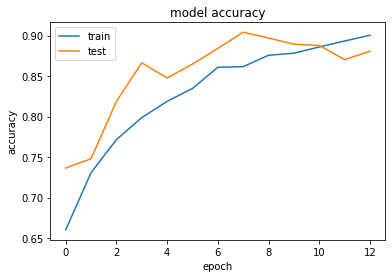

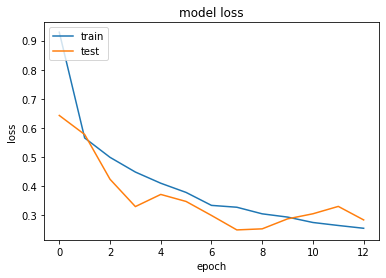

In [38]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save Model

In [43]:
model.save('CXRS-v1.h5')

# Validation accuracy of model

In [46]:
model.evaluate(validation_generator)

79/79 [==============================] - 23s 289ms/step - loss: 0.2493 - accuracy: 0.9042


[0.24925363063812256, 0.904213011264801]

# Confusion Matrix

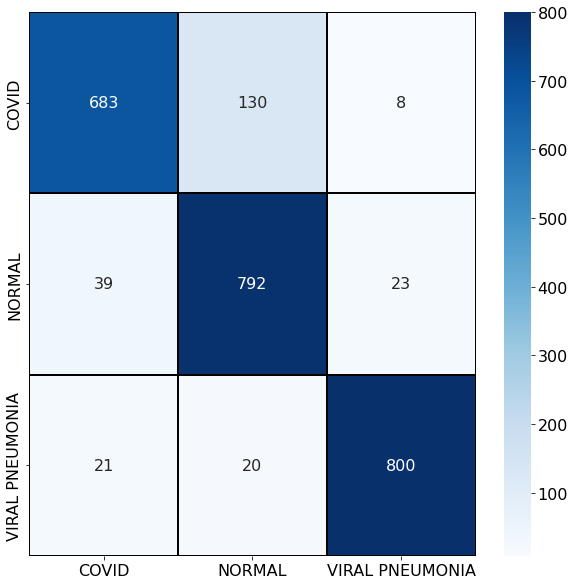

In [39]:
from sklearn.metrics import confusion_matrix
plt.rcParams.update({'font.size': 16})
predictions = model.predict(validation_generator)
predictions = np.argmax(predictions,axis=1)
predictions[:15]
cm = confusion_matrix(validation_generator.classes, predictions)
cm = pd.DataFrame(cm, index = ['0', '1', '2'], columns = ['0', '1', '2'])
cm
class_names = ['COVID','NORMAL','VIRAL PNEUMONIA']
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)

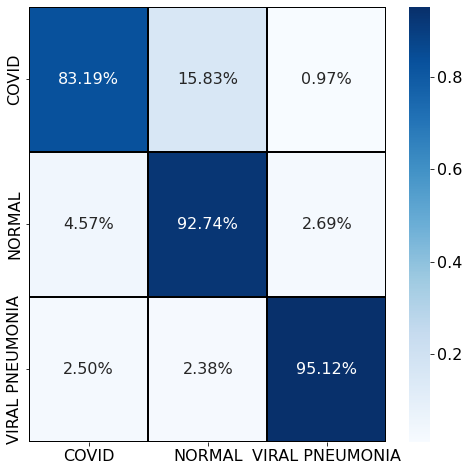

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(validation_generator.classes, predictions, normalize='true')
def plot_confusion_matrix (cm):
    plt.figure(figsize = (8,8))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt=".2%", 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)